<a href="https://colab.research.google.com/github/meenalj/dsnoob/blob/master/Wine_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Wine Data

### 1. Summary

### 2. Importing Packages

In [0]:
import numpy as np              
import pandas as pd
import warnings

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True) 

In [62]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.5.0)


In [51]:
!pip install chart-studio

In [52]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

### 3. Loading data

In [53]:
# Importing the data from the link
path ='https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv'
df_wine = pd.read_csv(path)
df_wine.head()


fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

### Data Dictionary
#### The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine#### The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine
|      Column Name     |                            Column Description                            |
|:--------------------:|:------------------------------------------------------------------------:|
| fixed acidity        | Most acids involved with wine or fixed                                   |
| volatile acidity     | The amount of acetic acid in wine                                        |
| citric acid          | Found in small quantities,add 'freshness' and flavor to wines            |
| residual sugar       | The amount of sugar remaining after fermentation stops                   |
| chlorides            | The amount of salt in the wine                                           |
| free sulfur dioxide  | The free form of SO2 prevents microbial growth and the oxidation of wine |
| total sulfur dioxide | Amount of free and bound forms of S02                                    |
| density              | The density of wine depends on the percent alcohol and sugar content     |
| pH                   | Most wines are between 3-4 on the pH scale                               |
| sulphates            | A wine additive which can contribute to sulfur dioxide gas (S02) levels  |
| alcohol              | The percent alcohol content of the wine                                  |
| quality              | Output variable (based on sensory data,score between 0 and 10)           |

In [54]:
# Shape of the data
df_wine.shape

(6497, 12)

In [55]:
##Understanding basic information about the wine data frame
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


#### Below are the insights recieved from the info function
- 6497 **samples(rows)**  and **12 columns** in the wine data frame
- **11 columns** with a **float** data type and **1 column** with **integer** datatype
- **0 missing values** in the data

In [56]:
## Understanding the various stats of the wine data frame
df_wine.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...    10.491801     5.818378
std         1.296434          0.164636  ...     1.192712     0.873255
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.400000          0.230000  ...     9.500000     5.000000
50%         7.000000          0.290000  ...    10.300000     6.000000
75%         7.700000          0.400000  ...    11.300000     6.000000
max        15.900000          1.580000  ...    14.900000     9.000000

[8 rows x 12 columns]

Below are some insights we recieve from the **describe** function
- Mean is close to median for almost all features
- There are outliers present in **residual sugar**, **free sulfur dioxide**, **total sulfur dioxide** columns which is seen by the huge difference between the 75% and max value

In [57]:
# number of unique values in each feature 
for x in df_wine.columns.values:
    print("Number of unique values of {}:{}".format(x,df_wine[x].nunique()))

Number of unique values of fixed acidity:106
Number of unique values of volatile acidity:187
Number of unique values of citric acid:89
Number of unique values of residual sugar:316
Number of unique values of chlorides:214
Number of unique values of free sulfur dioxide:135
Number of unique values of total sulfur dioxide:276
Number of unique values of density:998
Number of unique values of pH:108
Number of unique values of sulphates:111
Number of unique values of alcohol:111
Number of unique values of quality:7


#### 3.2 Pandas Profiling before Data Preprocessing

In [58]:
# To install pandas profiling 

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.4.0)


In [0]:
import pandas_profiling


In [79]:
##Generating the profiling report of wine data
pandas_profiling.ProfileReport(df_wine,title='Pandas profiling report of wine data',html={'style':{'full_width':True}})

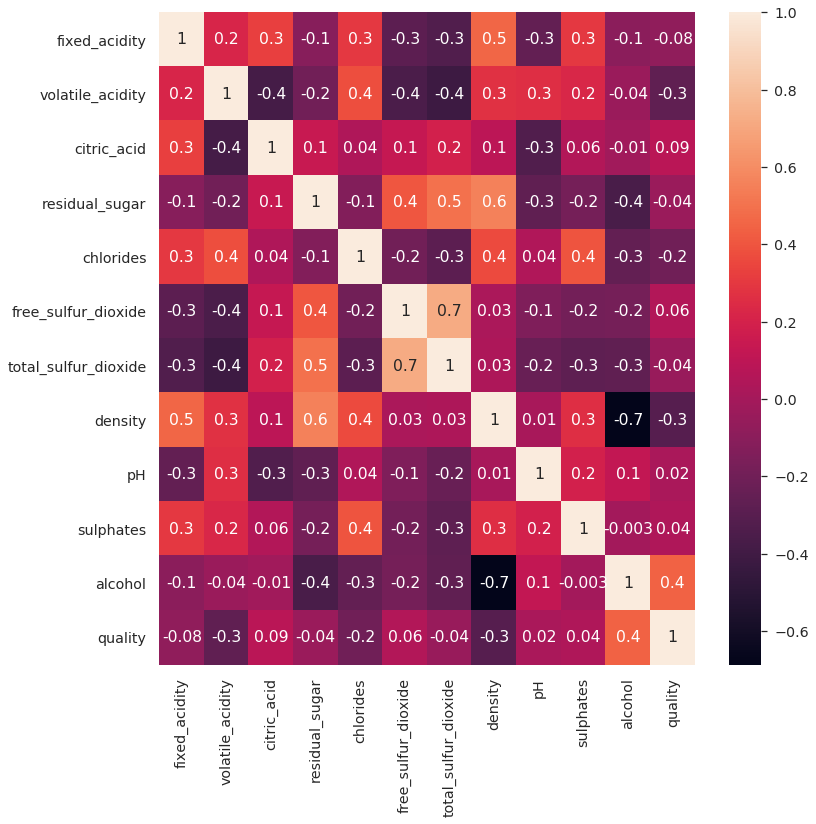

In [87]:
#heat map to find correlation
ax,fig = plt.subplots(figsize=(12,12))
sns.heatmap(df_wine.corr(),annot=True,fmt='.1g')
plt.show()

### 5. Exploratory Data Analysis

In [0]:
# Understand the quality of wines[
#sorted_quality=df_wine.sort_values['quality']
df_wine['quality'].value_counts().plot.bar(figsize=(10,7), colormap='Accent', fontsize=13)
plt.xlabel('Quality')
plt.ylabel('Count of wines')
plt.title('Count of Wines by Category')

In [0]:
# Wines with quality greater than 7
qual_7_plus=df_wine.loc[(df_wine['quality'] >=7)]
n_above_6 = qual_7_plus.shape[0]
print("Number of wines with rating greater than or equal to 7 is {}".format(n_above_6))